<h4>Import All Libraries</h4> 

In [11]:
library(caret)
library(ggplot2)
library(Metrics)
library(MASS)
library(splines)
library(rpart)
library(rpart.plot)
library(randomForest)
library(gbm)
library(caTools)
library(reshape2)
library(pROC)
library(PRROC)
library(dplyr)
library(leaps)
library(pls)

<h4> Importing Dataset "Breast Cancer Wisconsin" </h4>

In [12]:
data <- read.csv("/Users/kukulad/Desktop/Breast Cancer DataSet.csv")

# Inspect the first few rows of the dataset
head(data)

# Check for missing values
sum(is.na(data))
    
# If necessary, handle missing data, e.g., removing or imputing
data <- na.omit(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


[1] 0

<h4> Split data into 70% training and 30% testing </h4>

In [15]:
#using student id last 4 digit number
set.seed(8098)
train_index <- createDataPartition(data$diagnosis, p = 0.7, list = FALSE)  # 70% train, 30% test
train_data <- data[train_index, ]  # 70% training data
test_data <- data[-train_index, ]  # 30% testing data


 <h4> Part 1: Regression </h4>

<b> Linear Regression Model </b>


Call:
lm(formula = area_mean ~ radius_mean, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-66.46 -32.97 -12.18  15.97 533.54 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -744.0797    11.1907  -66.49   <2e-16 ***
radius_mean   98.8891     0.7651  129.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.11 on 397 degrees of freedom
Multiple R-squared:  0.9768,	Adjusted R-squared:  0.9767 
F-statistic: 1.671e+04 on 1 and 397 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


[1] "Linear Regression MSE: 3826.78"


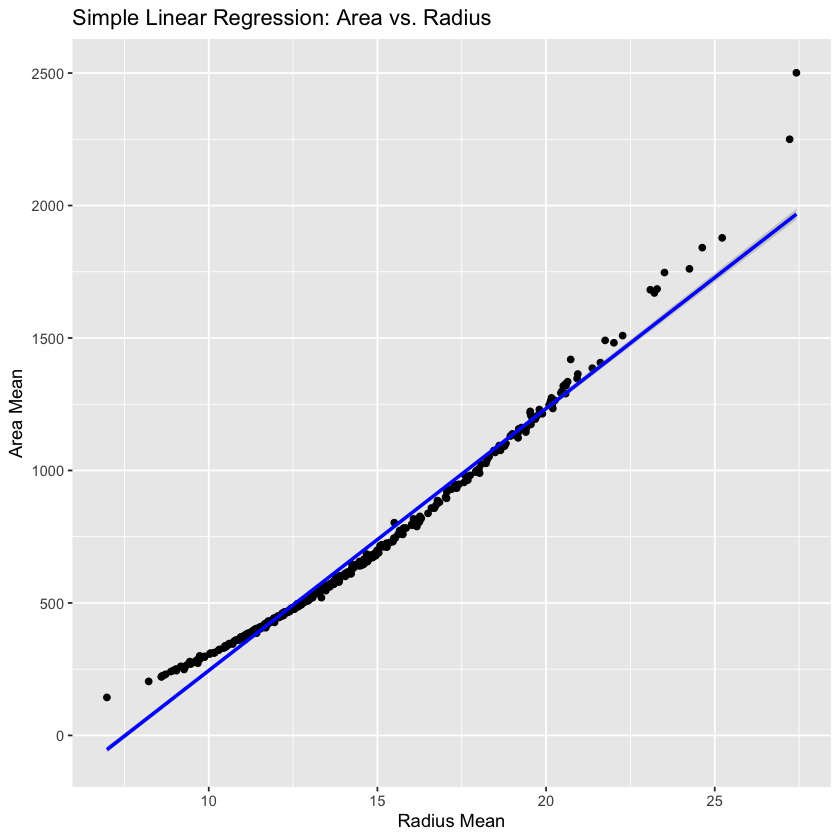

In [16]:
# Fit linear regression model using radius_mean as predictor
linear_model <- lm(area_mean ~ radius_mean, data = train_data)
summary(linear_model)

# Predict on test data
linear_predictions <- predict(linear_model, newdata = test_data)

# Plot the relationship
ggplot(train_data, aes(x = radius_mean, y = area_mean)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Simple Linear Regression: Area vs. Radius", x = "Radius Mean", y = "Area Mean")

# Evaluate performance using Mean Squared Error (MSE)
linear_mse <- mean((linear_predictions - test_data$area_mean)^2)
print(paste("Linear Regression MSE:", round(linear_mse, 2)))

<b> Polynomial Regression Model </b>


Call:
lm(formula = area_mean ~ poly(radius_mean, 2), data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.400  -3.547   0.018   3.517 164.837 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            660.9055     0.7414  891.39   <2e-16 ***
poly(radius_mean, 2)1 6863.8054    14.8100  463.46   <2e-16 ***
poly(radius_mean, 2)2 1016.2397    14.8100   68.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.81 on 396 degrees of freedom
Multiple R-squared:  0.9982,	Adjusted R-squared:  0.9982 
F-statistic: 1.097e+05 on 2 and 396 DF,  p-value: < 2.2e-16


[1] "Polynomial Regression MSE: 214.12"


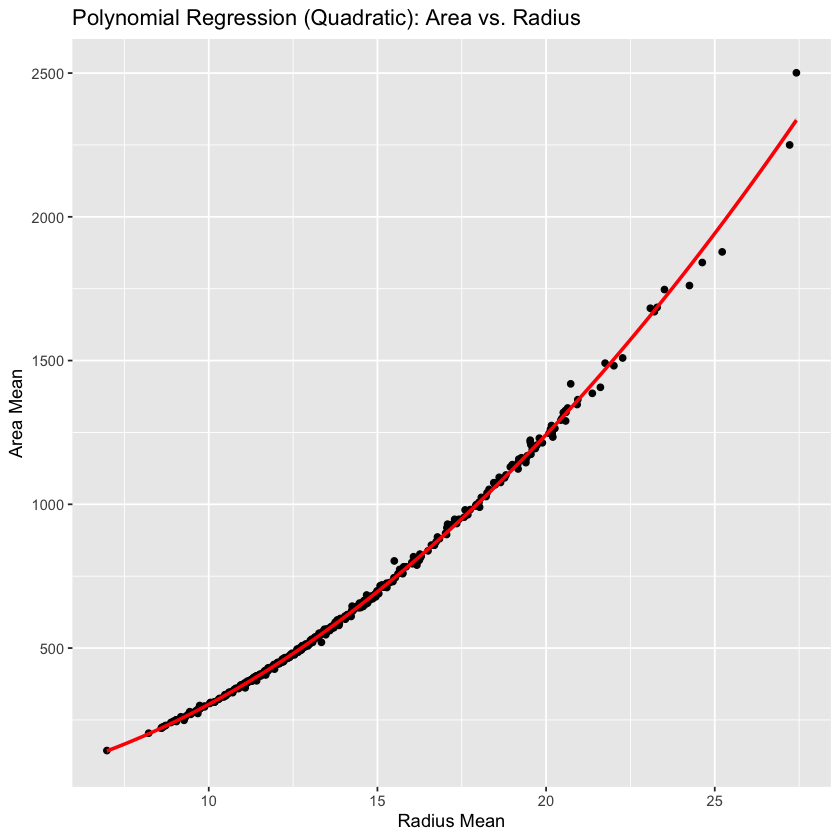

In [21]:
poly_model <- lm(area_mean ~ poly(radius_mean, 2), data = train_data)
summary(poly_model)

# Predict on test data
poly_predictions <- predict(poly_model, newdata = test_data)

# Plot the relationship
ggplot(train_data, aes(x = radius_mean, y = area_mean)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), col = "red") +
  labs(title = "Polynomial Regression (Quadratic): Area vs. Radius", x = "Radius Mean", y = "Area Mean")

# Evaluate performance using Mean Squared Error (MSE)
poly_mse <- mean((poly_predictions - test_data$area_mean)^2)
print(paste("Polynomial Regression MSE:", round(poly_mse, 2)))


<b> Multi- Linear Regression Model </b>


Call:
lm(formula = area_mean ~ radius_mean + texture_mean + perimeter_mean + 
    smoothness_mean, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-78.88 -29.37 -10.06  17.09 515.83 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -727.19893   33.94862 -21.421  < 2e-16 ***
radius_mean       62.43281   13.87522   4.500 8.97e-06 ***
texture_mean       0.07382    0.66650   0.111  0.91186    
perimeter_mean     5.27025    2.02258   2.606  0.00952 ** 
smoothness_mean  124.70027  230.06794   0.542  0.58811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.39 on 394 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9773 
F-statistic:  4294 on 4 and 394 DF,  p-value: < 2.2e-16


[1] "Multi-Linear Regression MSE: 3933.16"


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


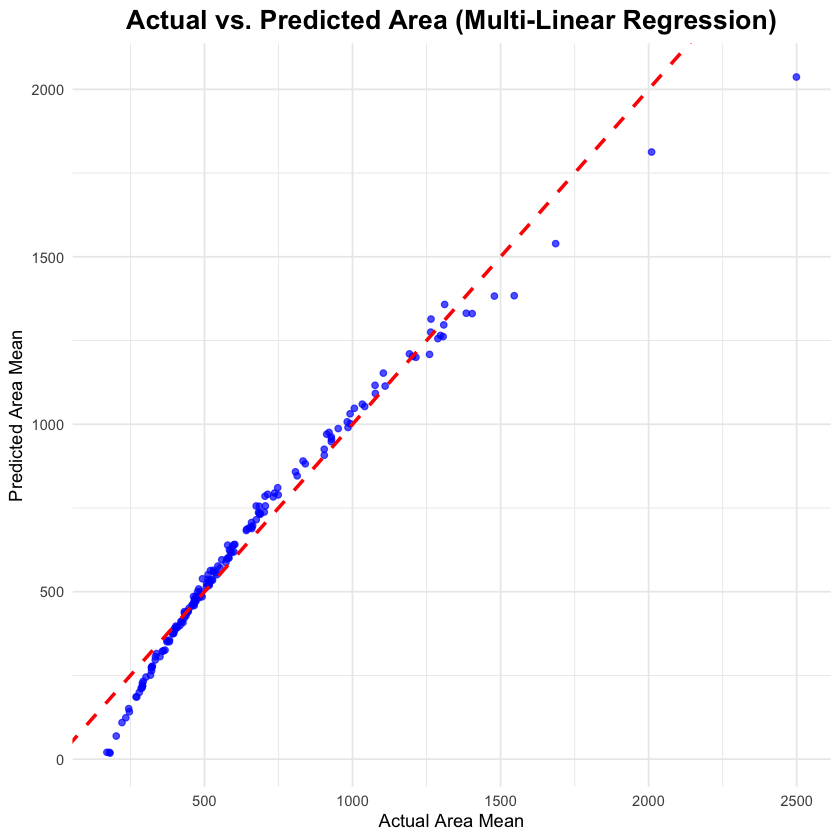

In [22]:
multi_model <- lm(area_mean ~ radius_mean + texture_mean + perimeter_mean + smoothness_mean, data = train_data)
summary(multi_model)

# Predict on test data
multi_predictions <- predict(multi_model, newdata = test_data)

# Evaluate performance using Mean Squared Error (MSE)
multi_mse <- mean((multi_predictions - test_data$area_mean)^2)
print(paste("Multi-Linear Regression MSE:", round(multi_mse, 2)))

# Create a data frame for plotting actual vs. predicted values
plot_data <- data.frame(Actual = test_data$area_mean, 
                        Predicted = multi_predictions)

# Draw the plot using ggplot2
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue", alpha = 0.7) +  # Scatter plot points
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed", size = 1) +  # Perfect prediction line (y = x)
  theme_minimal() +
  labs(title = "Actual vs. Predicted Area (Multi-Linear Regression)", 
       x = "Actual Area Mean", 
       y = "Predicted Area Mean") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

<h4> Part 2 : Part 2: Feature Selection / Model Optimization Methods </h4>

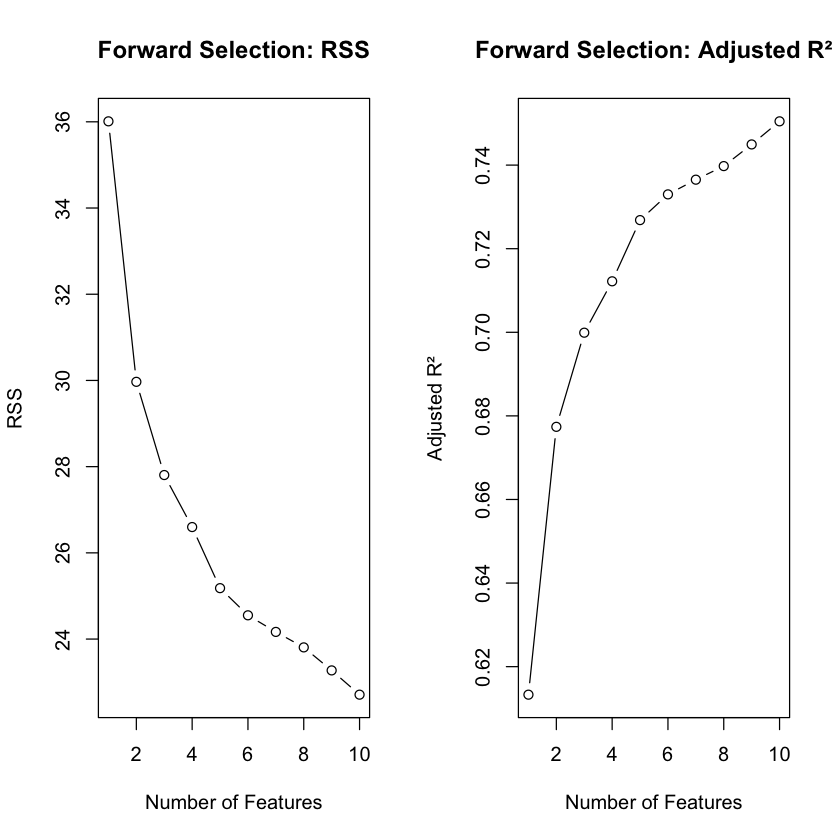

In [143]:
# Remove non-predictor columns (like 'id') and ensure 'diagnosis' is a factor
df$id <- NULL
df$diagnosis <- as.factor(df$diagnosis)

set.seed(8098)
# Train/test split (70/30)
trainIndex <- createDataPartition(df$diagnosis, p = 0.7, list = FALSE)
trainData <- df[trainIndex, ]
testData <- df[-trainIndex, ]

#Part 1: Forward Stepwise Selection

forward_model <- regsubsets(diagnosis ~ ., data = trainData, method = "forward", nvmax = 10)
forward_summary <- summary(forward_model)

# Plot RSS and Adjusted R² for forward selection
par(mfrow = c(1, 2))
plot(forward_summary$rss, type = "b", xlab = "Number of Features", ylab = "RSS", main = "Forward Selection: RSS")
plot(forward_summary$adjr2, type = "b", xlab = "Number of Features", ylab = "Adjusted R²", main = "Forward Selection: Adjusted R²")

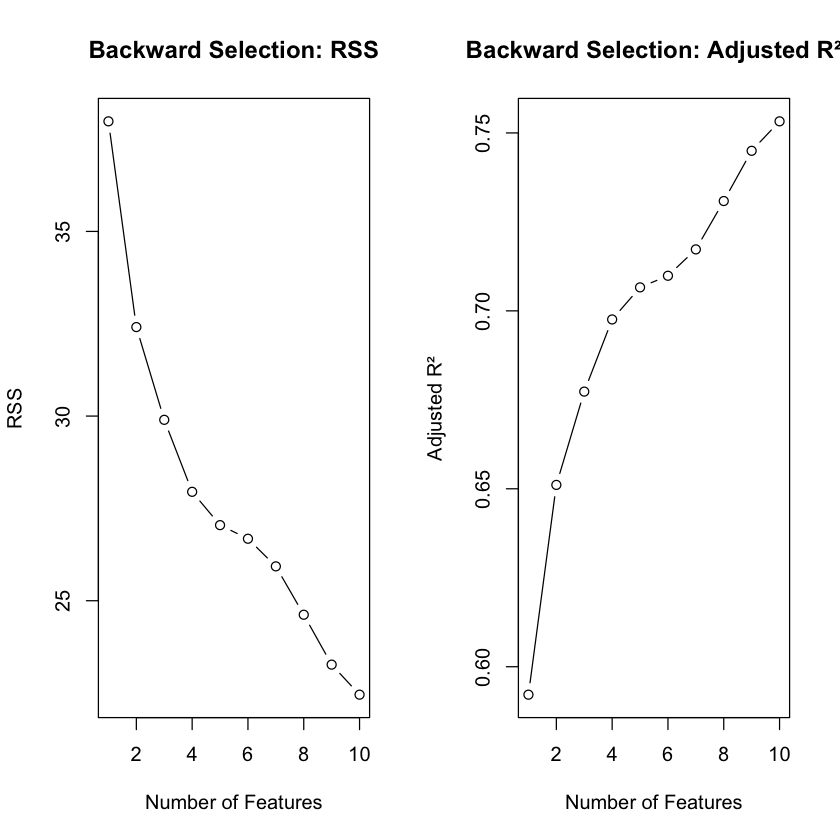

In [144]:
backward_model <- regsubsets(diagnosis ~ ., data = trainData, method = "backward", nvmax = 10)
backward_summary <- summary(backward_model)

# Plot RSS and Adjusted R² for backward selection
par(mfrow = c(1, 2))
plot(backward_summary$rss, type = "b", xlab = "Number of Features", ylab = "RSS", main = "Backward Selection: RSS")
plot(backward_summary$adjr2, type = "b", xlab = "Number of Features", ylab = "Adjusted R²", main = "Backward Selection: Adjusted R²")

         Actual
Predicted   0   1
        0 107   6
        1   0  57
[1] "Accuracy: 96.47 %"


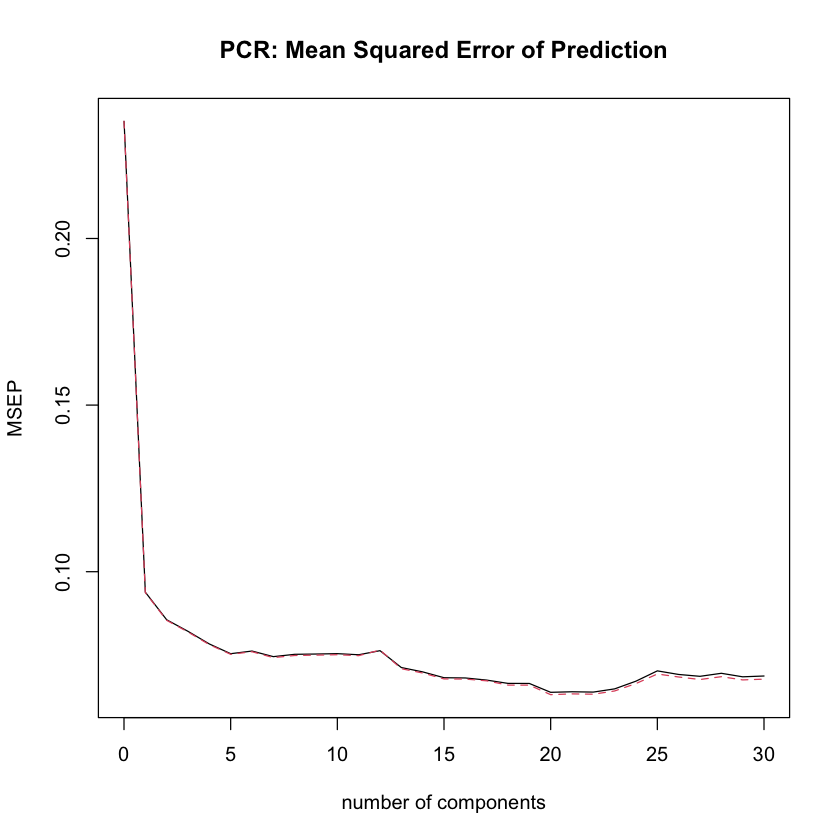

In [152]:
# Step 2: Convert 'diagnosis' to numeric (0 = B, 1 = M)
trainData$diagnosis <- ifelse(trainData$diagnosis == "M", 1, 0)
testData$diagnosis <- ifelse(testData$diagnosis == "M", 1, 0)

# Step 3: Ensure all predictors are numeric
trainData <- trainData %>% mutate(across(where(is.factor), as.numeric))
testData <- testData %>% mutate(across(where(is.factor), as.numeric))

# Step 4: Fit the PCR model
pcr_model <- pcr(diagnosis ~ ., data = trainData, scale = TRUE, validation = "CV")

# Step 5: Plot Mean Squared Error of Prediction (MSEP)
validationplot(pcr_model, val.type = "MSEP", main = "PCR: Mean Squared Error of Prediction")

# Step 6: Predict on the test data
pcr_pred <- predict(pcr_model, newdata = testData, ncomp = 10)  # Use optimal number of components
pcr_class <- ifelse(pcr_pred > 0.5, 1, 0)

# Step 7: Evaluate performance
confusion_matrix <- table(Predicted = pcr_class, Actual = testData$diagnosis)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(confusion_matrix)
print(paste("Accuracy:", round(accuracy * 100, 2), "%"))

<h4> Part 3 : Classification </h4>

<b> Logistic Regression </b>

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis ~ ., family = binomial, data = train_data)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)             -1.812e+03  1.247e+06  -0.001    0.999
id                       1.175e-07  2.625e-04   0.000    1.000
radius_mean             -1.924e+01  3.353e+05   0.000    1.000
texture_mean            -4.436e+00  8.098e+03  -0.001    1.000
perimeter_mean           8.108e+00  4.223e+04   0.000    1.000
area_mean               -4.953e-01  1.081e+03   0.000    1.000
smoothness_mean          2.343e+02  1.943e+06   0.000    1.000
compactness_mean        -1.923e+03  1.757e+06  -0.001    0.999
concavity_mean           1.121e+03  2.770e+06   0.000    1.000
concave.points_mean      1.162e+03  4.818e+06   0.000    1.000
symmetry_mean           -8.489e+01  1.852e+06   0.000    1.000
fractal_dimension_mean   6.051e+03  7.667e+06   0.001    0.999
radius_se                5.159e+01  1.151e+06   0.000    1.000
texture_se              -7.00

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 101   4
         M   6  60
                                          
               Accuracy : 0.9415          
                 95% CI : (0.8951, 0.9716)
    No Information Rate : 0.6257          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8759          
                                          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.9439          
            Specificity : 0.9375          
         Pos Pred Value : 0.9619          
         Neg Pred Value : 0.9091          
             Prevalence : 0.6257          
         Detection Rate : 0.5906          
   Detection Prevalence : 0.6140          
      Balanced Accuracy : 0.9407          
                                          
       'Positive' Class : B               
                              

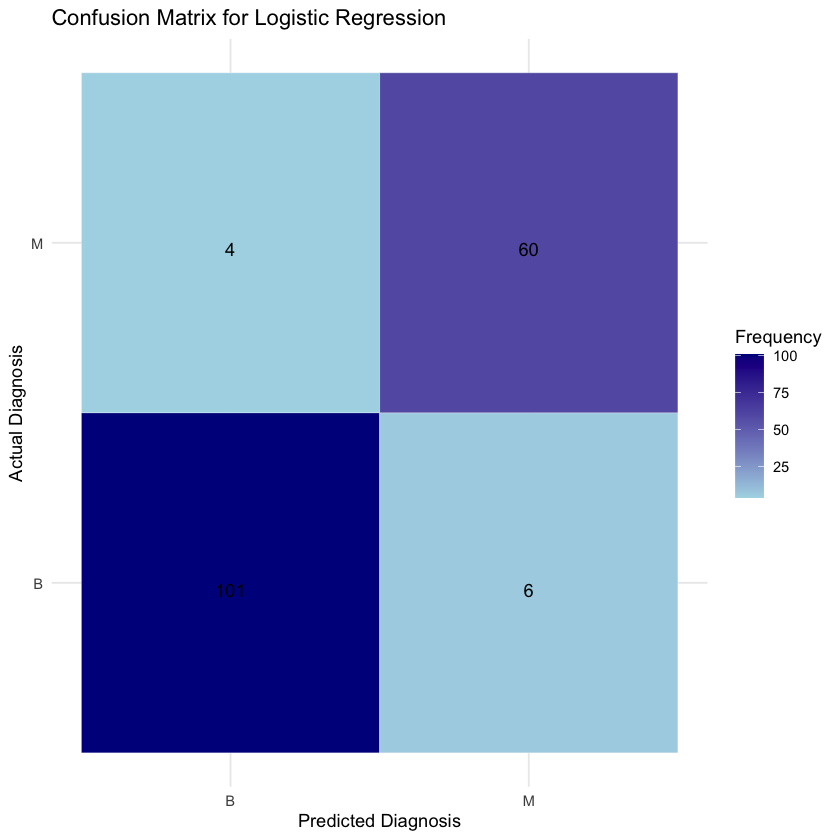

In [153]:
# Convert categorical variables to factors if necessary (e.g., "diagnosis" column)
data$diagnosis <- factor(data$diagnosis, levels = c("B", "M"))  # B = Benign, M = Malignant

# Split the data into training and test sets (70/30 split)
set.seed(8098)
split <- sample.split(data$diagnosis, SplitRatio = 0.7)
train_data <- subset(data, split == TRUE)
test_data <- subset(data, split == FALSE)

# Fit a Logistic Regression Model
logistic_model <- glm(diagnosis ~ ., data = train_data, family = binomial)

# Summarize the model
summary(logistic_model)

# Make predictions on the test data
logistic_pred <- predict(logistic_model, newdata = test_data, type = "response")
logistic_pred_class <- ifelse(logistic_pred > 0.5, "M", "B")  # Convert probabilities to class labels

# Evaluate the model (Confusion Matrix and Accuracy)
logistic_cm <- confusionMatrix(factor(logistic_pred_class), factor(test_data$diagnosis))

# Print the confusion matrix
print(logistic_cm)

# Extract the confusion matrix as a table
cm_table <- as.table(logistic_cm)

# Convert to a data frame for ggplot2
cm_df <- as.data.frame(cm_table)

# Rename columns for better readability
colnames(cm_df) <- c("Predicted", "Actual", "Frequency")

# Create a confusion matrix heatmap using ggplot2
ggplot(cm_df, aes(x = Predicted, y = Actual)) +
  geom_tile(aes(fill = Frequency), color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  geom_text(aes(label = Frequency), vjust = 1) +
  labs(title = "Confusion Matrix for Logistic Regression", 
       x = "Predicted Diagnosis", 
       y = "Actual Diagnosis") +
  theme_minimal()


 #Create a data frame to store predictions and actual values
plot_data <- data.frame(
  Actual = test_data$diagnosis,
  Predicted_Prob = logistic_pred
)

# Create a data frame to store predictions and actual values
plot_data <- data.frame(
  Actual = test_data$diagnosis,
  Predicted_Prob = logistic_pred
)

Setting levels: control = B, case = M

Setting direction: controls < cases



[1] "AUC: 0.96597546728972"


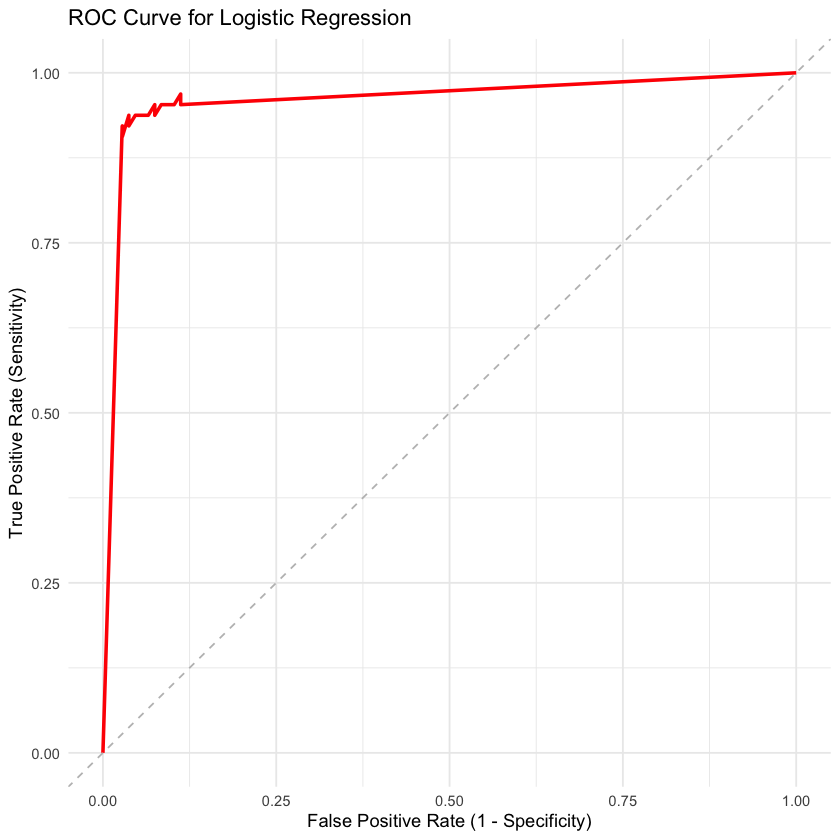

In [154]:
# Generate ROC curve using the test data
roc_curve <- roc(test_data$diagnosis, logistic_pred)

# Plot the ROC curve
ggplot(data = data.frame(
  tpr = roc_curve$sensitivities,
  fpr = 1 - roc_curve$specificities
), aes(x = fpr, y = tpr)) +
  geom_line(color = "red", size = 1) +
  geom_abline(linetype = "dashed", color = "gray") + 
  labs(title = "ROC Curve for Logistic Regression", x = "False Positive Rate (1 - Specificity)", y = "True Positive Rate (Sensitivity)") +
  theme_minimal()

# Print AUC
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))

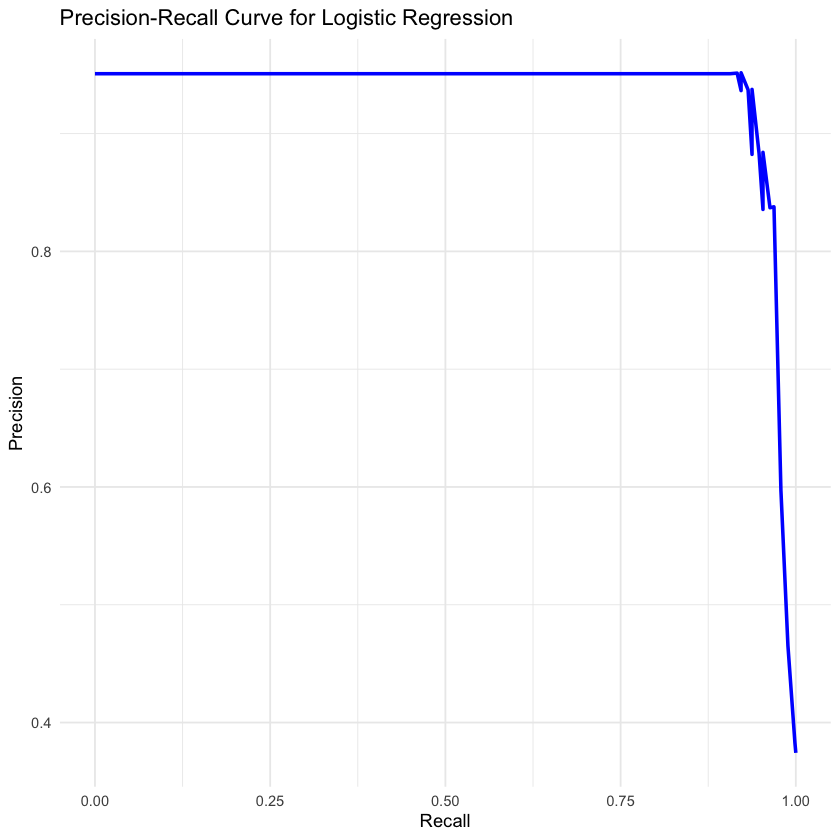

In [155]:
#Compute precision-recall curve
pr_curve <- pr.curve(scores.class0 = logistic_pred, weights.class0 = as.numeric(test_data$diagnosis == "M"), curve = TRUE)

# Extract precision and recall from the curve
pr_data <- data.frame(recall = pr_curve$curve[, 1], precision = pr_curve$curve[, 2])

# Plot Precision-Recall curve using ggplot2
ggplot(pr_data, aes(x = recall, y = precision)) +
  geom_line(color = "blue", size = 1) +
  labs(title = "Precision-Recall Curve for Logistic Regression", x = "Recall", y = "Precision") +
  theme_minimal()

<b> Linear Discriminant Analysis </b>

Call:
lda(diagnosis ~ ., data = train_data)

Prior probabilities of groups:
        B         M 
0.6281407 0.3718593 

Group means:
        id radius_mean texture_mean perimeter_mean area_mean smoothness_mean
B 22149301    12.12359     18.06828        77.8852  461.1084      0.09234804
M 40627730    17.49838     21.88986       115.6187  982.1892      0.10283899
  compactness_mean concavity_mean concave.points_mean symmetry_mean
B         0.079156      0.0452794          0.02523998     0.1742148
M         0.144987      0.1618534          0.08811318     0.1921115
  fractal_dimension_mean radius_se texture_se perimeter_se  area_se
B             0.06272216 0.2833572   1.222308     1.986392 21.02967
M             0.06272169 0.6149865   1.219985     4.348351 73.65791
  smoothness_se compactness_se concavity_se concave.points_se symmetry_se
B   0.007296924     0.02101942   0.02622382       0.009803756  0.02051716
M   0.006922649     0.03213667   0.04224669       0.015175432  0.01994062
  fract

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 106   8
         M   1  56
                                          
               Accuracy : 0.9474          
                 95% CI : (0.9024, 0.9757)
    No Information Rate : 0.6257          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8851          
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.9907          
            Specificity : 0.8750          
         Pos Pred Value : 0.9298          
         Neg Pred Value : 0.9825          
             Prevalence : 0.6257          
         Detection Rate : 0.6199          
   Detection Prevalence : 0.6667          
      Balanced Accuracy : 0.9328          
                                          
       'Positive' Class : B               
                              

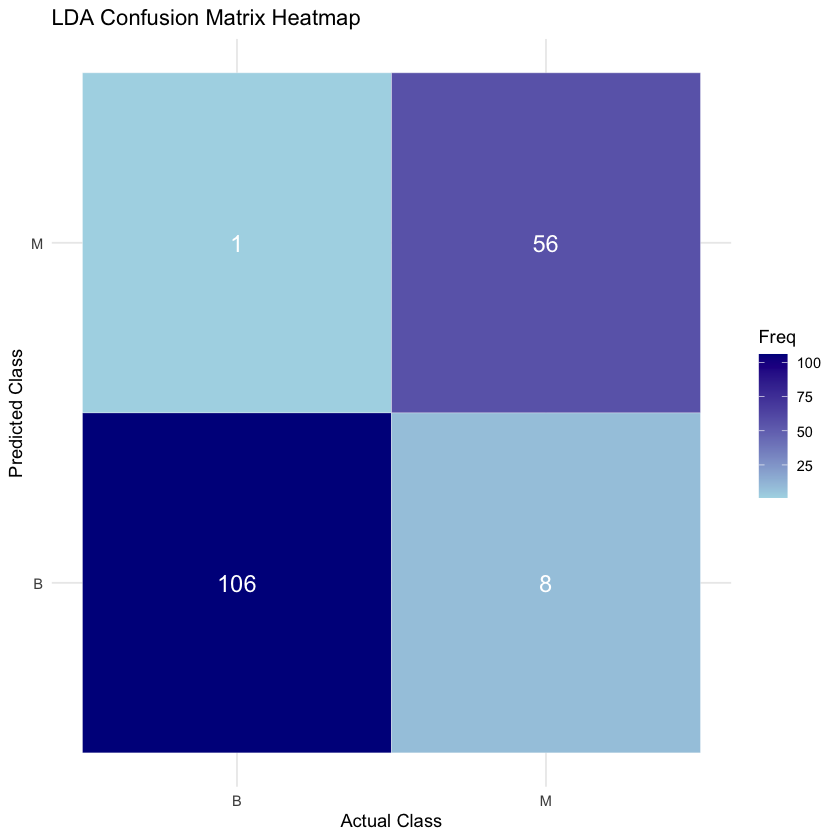

In [156]:
# Fit a Linear Discriminant Analysis (LDA) Model
lda_model <- lda(diagnosis ~ ., data = train_data)

# Summarize the model
lda_model

# Make predictions on the test data
lda_pred <- predict(lda_model, newdata = test_data)
lda_pred_class <- lda_pred$class

#  Evaluate the model (Confusion Matrix and Accuracy)
lda_cm <- confusionMatrix(factor(lda_pred_class), factor(test_data$diagnosis))
lda_cm

# Create a confusion matrix table
confusion_table <- as.table(lda_cm$table)
confusion_df <- as.data.frame(confusion_table)

# Rename columns for better readability
colnames(confusion_df) <- c("Predicted", "Actual", "Freq")

# Plot heatmap using ggplot2
ggplot(confusion_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  geom_text(aes(label = Freq), color = "white", size = 5) +
  labs(title = "LDA Confusion Matrix Heatmap", x = "Actual Class", y = "Predicted Class") +
  theme_minimal()

<b><h3>Section B:</b></h3>

<h4> Part 1: Splines </h4>

<b> Polynomial Regression </b>

'data.frame':	569 obs. of  32 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

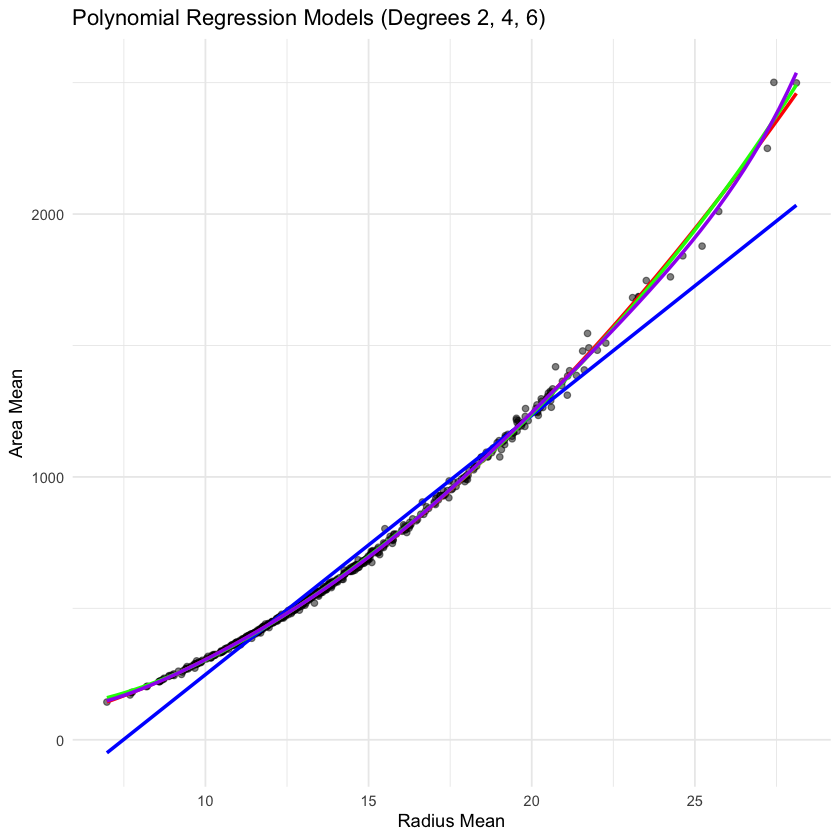

In [157]:
# Convert diagnosis column to factor (if not already)
data$diagnosis <- factor(data$diagnosis, levels = c("B", "M"))  # B = Benign, M = Malignant

# Filter and check for missing values
data <- na.omit(data)  # Remove rows with NA values

# Check structure of the data to ensure 'radius_mean' and 'area_mean' are numeric
str(data)

# Fit polynomial regression models with different degrees
poly2 <- lm(area_mean ~ poly(radius_mean, 2), data = data) # Quadratic
poly4 <- lm(area_mean ~ poly(radius_mean, 4), data = data) # 4th degree
poly6 <- lm(area_mean ~ poly(radius_mean, 6), data = data) # 6th degree

# Plot the polynomial models
ggplot(data, aes(x = radius_mean, y = area_mean)) +
  geom_point(alpha = 0.5, color = "black") +  # Data points
  stat_smooth(method = "lm", formula = y ~ poly(x, 1), color = "blue", se = FALSE) + # Linear
  stat_smooth(method = "lm", formula = y ~ poly(x, 2), color = "red", se = FALSE) +  # Quadratic
  stat_smooth(method = "lm", formula = y ~ poly(x, 4), color = "green", se = FALSE) + # 4th degree
  stat_smooth(method = "lm", formula = y ~ poly(x, 6), color = "purple", se = FALSE) + # 6th degree
  labs(
    title = "Polynomial Regression Models (Degrees 2, 4, 6)", 
    x = "Radius Mean", 
    y = "Area Mean"
  ) +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red", "green", "purple")) 

<b>Splines </b>

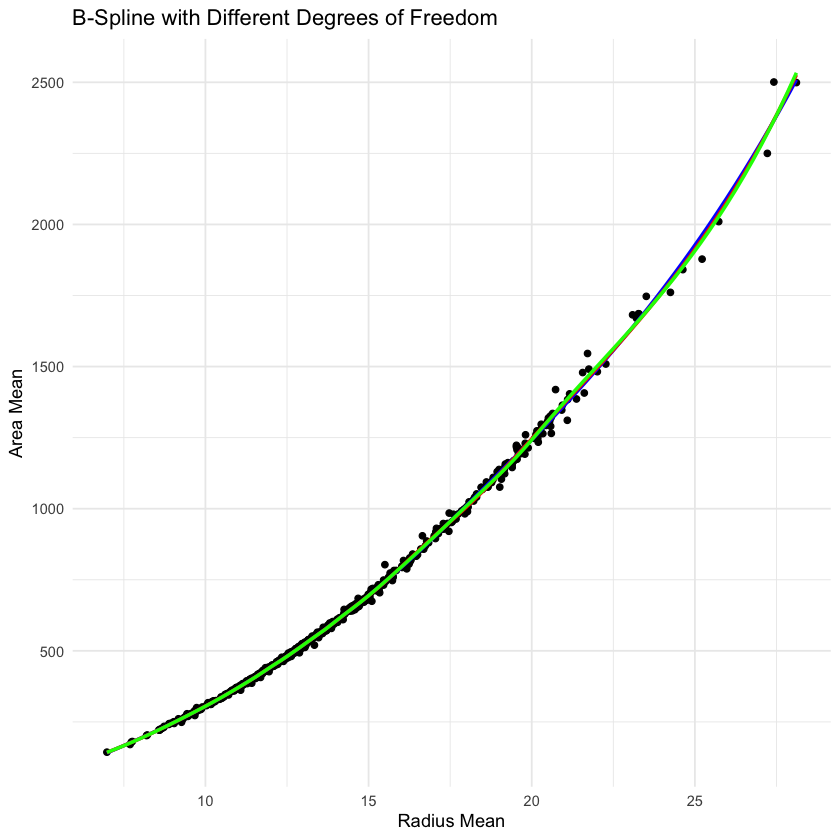

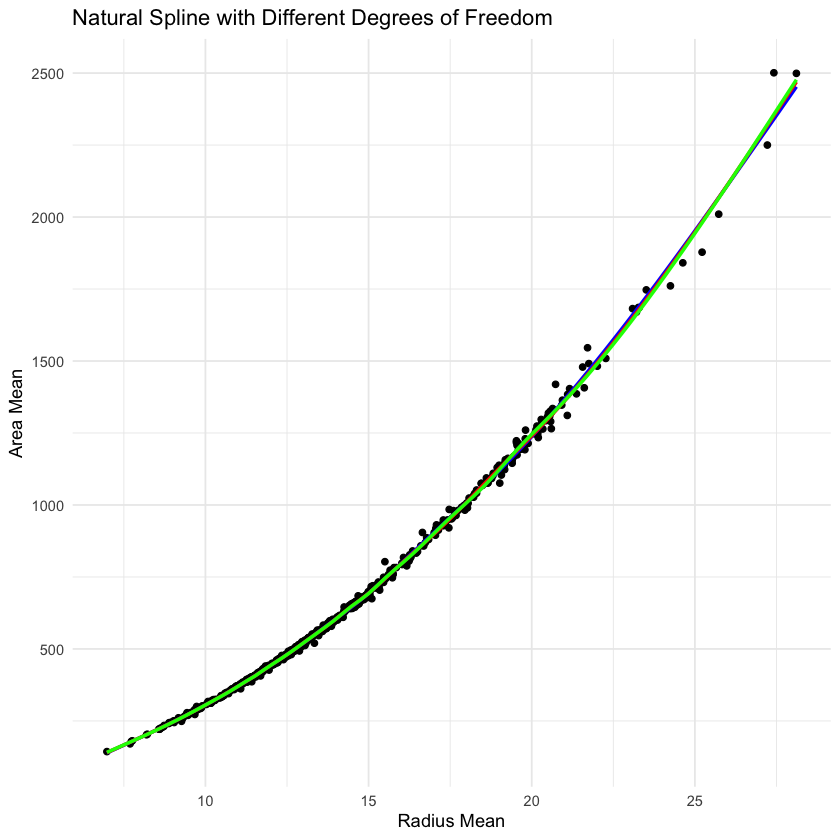

In [158]:
#  Fit B-Spline models with different degrees of freedom (df)
bs_df9 <- lm(area_mean ~ bs(texture_mean, df = 9), data = data)
bs_df16 <- lm(area_mean ~ bs(texture_mean, df = 16), data = data)
bs_df22 <- lm(area_mean ~ bs(texture_mean, df = 22), data = data)

#  Fit Natural Spline models with different degrees of freedom (df)
ns_df9 <- lm(area_mean ~ ns(texture_mean, df = 9), data = data)
ns_df16 <- lm(area_mean ~ ns(texture_mean, df = 16), data = data)
ns_df22 <- lm(area_mean ~ ns(texture_mean, df = 22), data = data)

# Plot the B-Spline fits for df = 9, 16, 22
ggplot(data, aes(x = radius_mean, y = area_mean)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ bs(x, df = 9), color = "blue", se = FALSE) +
  stat_smooth(method = "lm", formula = y ~ bs(x, df = 16), color = "red", se = FALSE) +
  stat_smooth(method = "lm", formula = y ~ bs(x, df = 22), color = "green", se = FALSE) +
  labs(title = "B-Spline with Different Degrees of Freedom", 
       x = "Radius Mean", 
       y = "Area Mean") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red", "green"))

# Plot the Natural Spline fits for df = 9, 16, 22
ggplot(data, aes(x = radius_mean, y = area_mean)) +
  geom_point() +
  stat_smooth(method = "lm", formula = y ~ ns(x, df = 9), color = "blue", se = FALSE) +
  stat_smooth(method = "lm", formula = y ~ ns(x, df = 16), color = "red", se = FALSE) +
  stat_smooth(method = "lm", formula = y ~ ns(x, df = 22), color = "green", se = FALSE) +
  labs(title = "Natural Spline with Different Degrees of Freedom", 
       x = "Radius Mean", 
       y = "Area Mean") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red", "green"))

<h4>Part 2: Tree and Svm </h4>

<b> Tree Clasification</b>

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 103   7
         M   4  57
                                          
               Accuracy : 0.9357          
                 95% CI : (0.8878, 0.9675)
    No Information Rate : 0.6257          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8614          
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.9626          
            Specificity : 0.8906          
         Pos Pred Value : 0.9364          
         Neg Pred Value : 0.9344          
             Prevalence : 0.6257          
         Detection Rate : 0.6023          
   Detection Prevalence : 0.6433          
      Balanced Accuracy : 0.9266          
                                          
       'Positive' Class : B               
                              

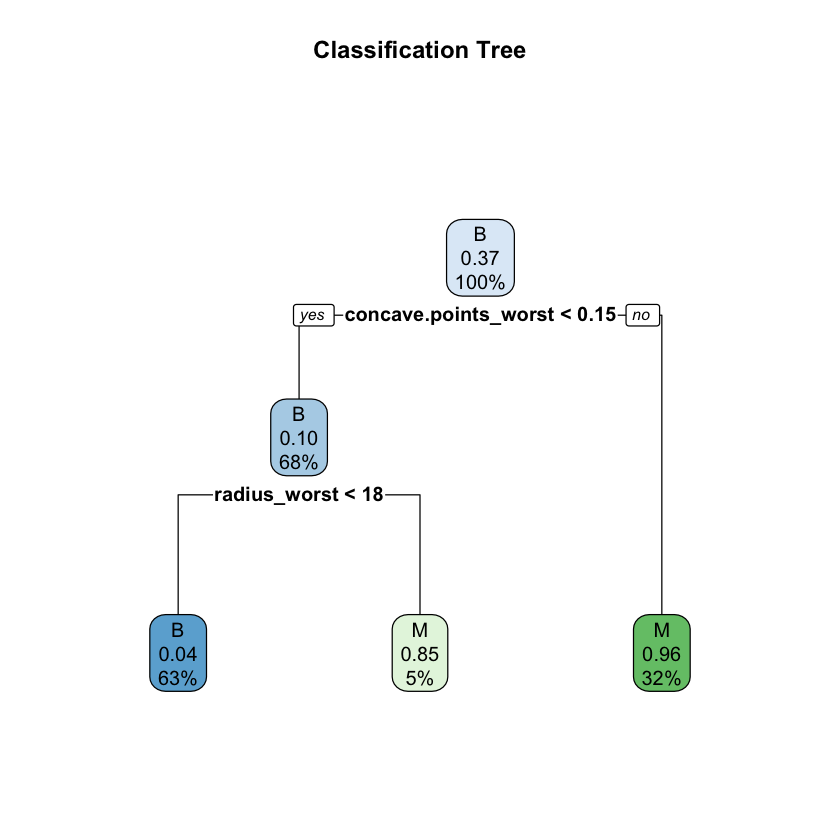

In [159]:
# Train a classification tree
tree_model <- rpart(diagnosis ~ ., data = train_data, method = "class")

# Plot the tree
rpart.plot(tree_model, main = "Classification Tree")

# Predict on the test set
tree_pred <- predict(tree_model, newdata = test_data, type = "class")

# Confusion Matrix for Classification Tree
tree_cm <- confusionMatrix(tree_pred, test_data$diagnosis)
print(tree_cm)

<b> Random Forest </b>

                                 B          M MeanDecreaseAccuracy
id                       1.7960032  0.3584459            1.8685180
radius_mean              3.1906955  2.4042125            3.5810743
texture_mean             2.8325520  3.1806959            5.2071777
perimeter_mean           4.2703921  2.7460361            4.6014500
area_mean                4.4165097  3.6545453            5.2435893
smoothness_mean          1.9625553  3.0226708            3.2367162
compactness_mean         0.9454993  1.8529564            2.0830287
concavity_mean           2.3654157  3.3899734            3.7259195
concave.points_mean      3.7112930  5.0251344            6.6912713
symmetry_mean           -0.5547839  1.7711108            0.7318518
fractal_dimension_mean   1.4217877  1.3178204            1.7468275
radius_se                3.3072767  2.3206849            3.9227845
texture_se               0.6258750  0.4849133            0.8725437
perimeter_se             3.3049496  2.7446731            4.190

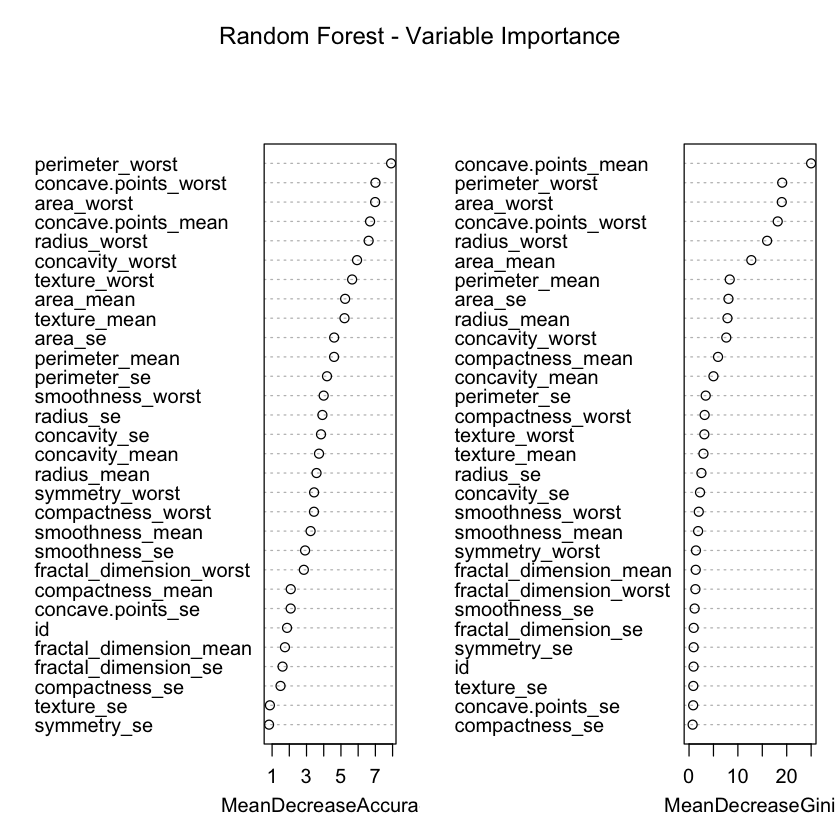

In [160]:
rf_model <- randomForest(diagnosis ~ ., data = train_data, ntree = 100, mtry = 4, importance = TRUE)

# View importance of features
print(importance(rf_model))

# Predict on the test set
rf_pred <- predict(rf_model, newdata = test_data)

# Confusion Matrix for Random Forest
rf_cm <- confusionMatrix(rf_pred, test_data$diagnosis)
print(rf_cm)

# Plot Variable Importance
varImpPlot(rf_model, main = "Random Forest - Variable Importance")

<b> Boosted based </b>

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 105   7
         M   2  57
                                          
               Accuracy : 0.9474          
                 95% CI : (0.9024, 0.9757)
    No Information Rate : 0.6257          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8858          
                                          
 Mcnemar's Test P-Value : 0.1824          
                                          
            Sensitivity : 0.9813          
            Specificity : 0.8906          
         Pos Pred Value : 0.9375          
         Neg Pred Value : 0.9661          
             Prevalence : 0.6257          
         Detection Rate : 0.6140          
   Detection Prevalence : 0.6550          
      Balanced Accuracy : 0.9360          
                                          
       'Positive' Class : B               
                              

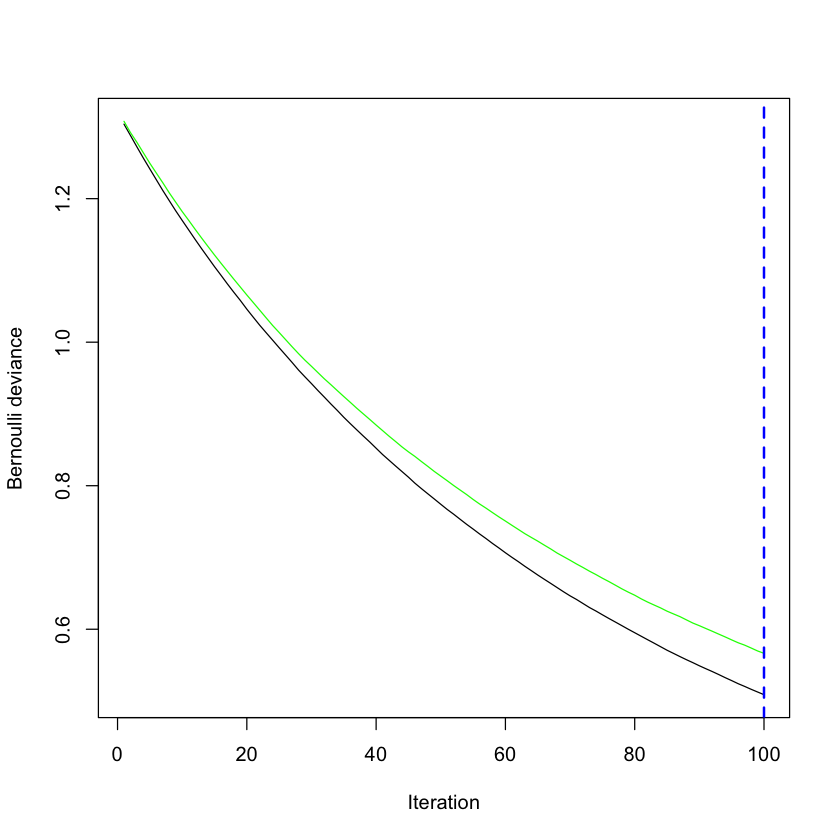

In [161]:

train_data$diagnosis_num <- ifelse(train_data$diagnosis == "M", 1, 0)
test_data$diagnosis_num <- ifelse(test_data$diagnosis == "M", 1, 0)

# Train a GBM (Boosted Tree) model
set.seed(8098)
gbm_model <- gbm(diagnosis_num ~ ., 
                 data = train_data[, -which(names(train_data) == "diagnosis")], 
                 distribution = "bernoulli", 
                 n.trees = 100, 
                 interaction.depth = 4, 
                 shrinkage = 0.01, 
                 cv.folds = 5)

# Check the best number of trees (based on cross-validation)
best_trees <- gbm.perf(gbm_model, method = "cv")

# Predict on the test set
gbm_pred <- predict(gbm_model, newdata = test_data[, -which(names(test_data) == "diagnosis")], n.trees = best_trees, type = "response")

# Convert predictions to class labels (0.5 threshold)
gbm_pred_class <- ifelse(gbm_pred > 0.5, "M", "B")

# Confusion Matrix for Boosting.
gbm_cm <- confusionMatrix(factor(gbm_pred_class), test_data$diagnosis)
print(gbm_cm)

<b> Support Vector Machine </b>

<b> Linear SVC Model </b>

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107   0
         M   0  64
                                     
               Accuracy : 1          
                 95% CI : (0.9787, 1)
    No Information Rate : 0.6257     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6257     
         Detection Rate : 0.6257     
   Detection Prevalence : 0.6257     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : B          
                                     


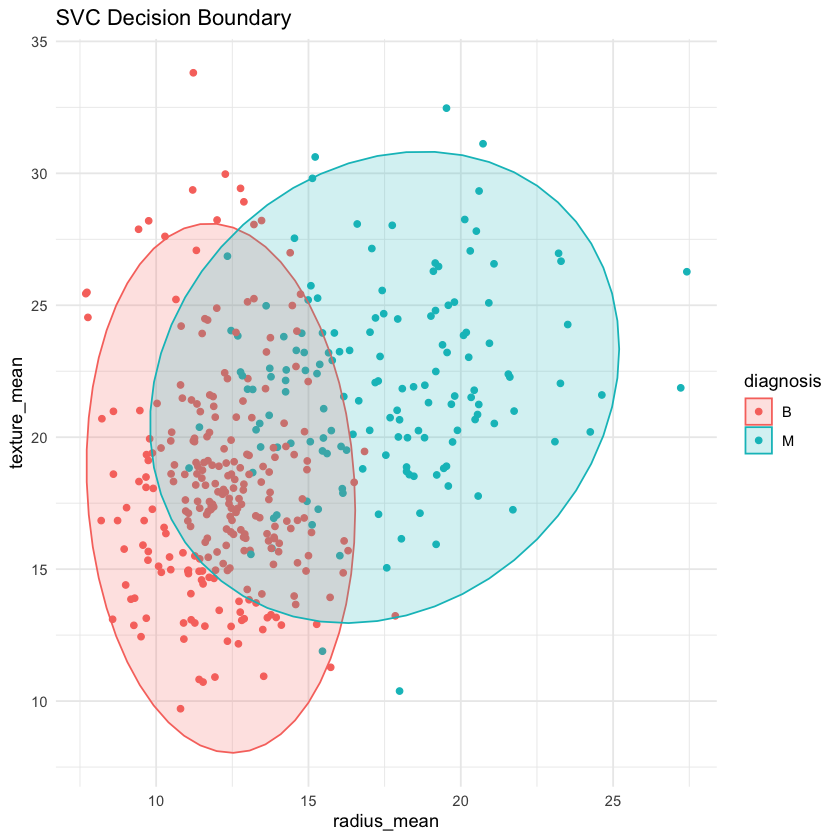

In [162]:
# Train a linear SVC model
svc_model <- svm(diagnosis ~ ., data = train_data, kernel = "linear", cost = 1)

# Predict on the test set
svc_pred <- predict(svc_model, newdata = test_data)

# Confusion Matrix for SVC
svc_cm <- confusionMatrix(svc_pred, test_data$diagnosis)
print(svc_cm)

# Plot the decision boundary for SVC (only using 2 predictors for visualization)
ggplot(train_data, aes(x = radius_mean, y = texture_mean, color = diagnosis)) +
  geom_point() +
  stat_ellipse(aes(x = radius_mean, y = texture_mean, fill = diagnosis), type = 'norm', geom = 'polygon', alpha = 0.2) +
  ggtitle("SVC Decision Boundary") +
  theme_minimal()


<b> Radial SVM Model </b>

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 107   0
         M   0  64
                                     
               Accuracy : 1          
                 95% CI : (0.9787, 1)
    No Information Rate : 0.6257     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6257     
         Detection Rate : 0.6257     
   Detection Prevalence : 0.6257     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : B          
                                     


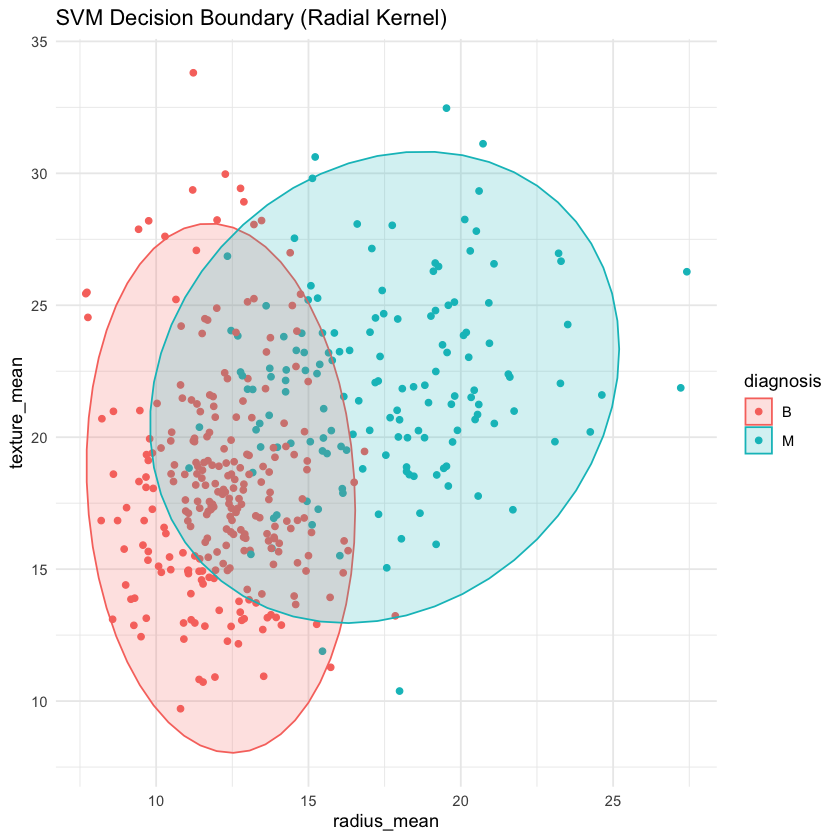

In [163]:
# Train a radial SVM model
svm_model <- svm(diagnosis ~ ., data = train_data, kernel = "radial", cost = 1, gamma = 1/ncol(train_data))

# Predict on the test set
svm_pred <- predict(svm_model, newdata = test_data)

# Confusion Matrix for SVM
svm_cm <- confusionMatrix(svm_pred, test_data$diagnosis)
print(svm_cm)

# Plot the decision boundary for SVM (only using 2 predictors for visualization)
ggplot(train_data, aes(x = radius_mean, y = texture_mean, color = diagnosis)) +
  geom_point() +
  stat_ellipse(aes(x = radius_mean, y = texture_mean, fill = diagnosis), type = 'norm', geom = 'polygon', alpha = 0.2) +
  ggtitle("SVM Decision Boundary (Radial Kernel)") +
  theme_minimal()

<h4> Part 3: Netural Nets </h4>

<b>

| Topologies           | Sigmoid Function                                   | Relu Function            |
|-----------------------|-------------------------------|------------------------------------------------------|
|                       | Training Accuracy | Testing Accuracy|           Training Accuracy | Testing Accuracy |
| [256,96,32,10]        | 53.75%               | 61.12%                  | 95.05%           | 95.53%           |
| [96,32,10]            | 57.88%               | 61.38%                 |88.24%               | 89.49%           |
| [128,64,32,10]        | 35.70%               | 44.42%                 | 94.73%               | 95.29%           |


| Optimal Topology Identified | Relu Function [256,96,32,10]||



| Learning Rate    | 0.1                    | 0.01                     | 0.001                  | 0.0001                 |
|-----------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|
| Training Accuracy | 96.78%                     | 89.60%                     | 41.80%                     | 9.87%                      |
| Testing Accuracy  | 96.76%                     | 89.84%                     | 42.38%                     | 9.80%                      |



 | Optimal Learning Rate Identified | Relu Function, [256,96,32,10], 0.1 |




| Batch Size         | 128                       | 64                          | 32                         |
|---------------------|----------------------|-----------------------------|-----------------------------|
| Training Accuracy   | 96.34%                 | 97.39%                        | 97.46%                     |
|Testing Accuracy   | 95.71%                   | 96.16%                        | 96.82%                     |


                                  
| Optimal Batch Size Identified | Relu Function, [256,96,32,10], 0.1, 32 |




| Overall Best Model Evaluation | Peak Training Accuracy Achieved | Peak Testing Accuracy Achieved |
|------------------------------------|-------------------------------------|-------------------------------------|
|                                    | 97.46%                         | 96.82%                          |

</b>





1) Compare the topologies and provide the reason the chosen topology worked out to be the best
along with the activation function?

Ans : [256, 96, 32, 10] with ReLU activation is the selected topology.
Justification for the Decision: In terms of training and testing accuracy, the topology [256, 96, 32, 10] in conjunction with the ReLU activation function outperformed other designs by a large margin.
Findings:
95.05% is the training accuracy.
95.53% is the testing accuracy.
In particular, this design fared better in terms of training and testing accuracy than other topologies like [128, 64, 32, 10] and [96, 32, 10]. Better learning and feature extraction were made possible by the deeper network ([256, 96, 32, 10]), which is essential for the MNIST dataset.
Because it can prevent vanishing gradients and enable quicker convergence, the ReLU function performed better than the Sigmoid function.


2) Does topology and activation function depend on each other? If yes, then how and why?

Ans : They do rely on one another, yes:
The neural network's topology describes its organization, including the number of layers and neurons in each layer. Through the use of non-linear activation functions, a deeper and more intricate network (such as [256, 96, 32, 10]) may capture intricate patterns in the data.
The way information moves across the network is controlled by activation functions like Sigmoid or ReLU. ReLU benefits multi-layer networks because, unlike Sigmoid, it does not suffer from the vanishing gradient issue, which improves training speed and accuracy in deep designs.
In conclusion, a robust activation function such as ReLU is advantageous for more complicated topologies, although lesser-complexity networks may not require such a strong function.


3) What learning rate felt like the best choice and why?

Ans : 0.1 is the ideal learning rate.
Reason: The best testing accuracy (96.76%) and a strong training accuracy (96.78%) were obtained with a learning rate of 0.1. As demonstrated with lower rates like 0.001 and 0.0001 (which resulted in subpar performance), this learning rate is high enough to accelerate convergence without causing the model to overshoot the optimal weights. The model can update weights more effectively with higher learning rates, such as 0.1, but going overboard might cause instability.


4) What impacted the batch size on the performance of the model?

Ans : 32 is the ideal batch size.
Reason: The maximum testing accuracy (96.82%) was achieved with a batch size of 32. Performance on the test set was somewhat worse with smaller batch sizes (64 or 128 for example).
Noisier gradients found in smaller batches can aid in escaping local minima and improve generalization, which in turn increases testing accuracy.
A more stable gradient is frequently produced by larger batches, but the model may overfit to the training set as a result, which would hinder its capacity to generalize.


5) Are the learning rate and batch size correlated? What notable changes were observed during the
entire process?

Ans : Correlation: In this experiment, learning rate and batch size do not directly correlate. Although 0.1 and 32 were the ideal learning rates and batch sizes, altering one did not always necessitate altering the other.
Notable Changes: Although the learning rate remained constant, testing accuracy increased with smaller batch sizes whether the batch size was raised to 128 or lowered to 32.
Training over a range of batch sizes was made quicker and more stable with a learning rate of 0.1.
Key takeaway: Because learning rate and batch size can have different effects on performance, it's crucial to experiment with them separately.


<h4> Video Link </h4>